<a href="https://colab.research.google.com/github/paridhi-pandey/nn-dl-day-2/blob/main/NN_DL_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task-1

###Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

###Setting Parameters

In [ ]:
vocab_size = 10000  # Top 10,000 most frequent words
maxlen = 200        # Max review length (after padding)

###Loading IMDB Data

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

###Decoding function for display

In [ ]:
word_index = imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0], index_word[1], index_word[2] = "<PAD>", "<START>", "<UNK>"

def decode_review(sequence):
    return " ".join([index_word.get(i, "?") for i in sequence])

###Sample Decoded Review

In [ ]:
print("Example review:\n", decode_review(X_train[0]))
print("Sentiment:", "Positive" if y_train[0] == 1 else "Negative")

Example review:
 and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life a

###Padding

In [ ]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

###Built Model

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


###Trained Model

In [ ]:
history = model.fit(X_train, y_train, epochs=3, validation_split=0.2, batch_size=64)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 139ms/step - accuracy: 0.6826 - loss: 0.5581 - val_accuracy: 0.8640 - val_loss: 0.3273
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.9042 - loss: 0.2541 - val_accuracy: 0.8698 - val_loss: 0.3226
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 129ms/step - accuracy: 0.9284 - loss: 0.1893 - val_accuracy: 0.8696 - val_loss: 0.3709


###Evaluating

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8613 - loss: 0.3932

Test Accuracy: 0.86


#Task-2

###Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

###Loading data

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###Normalizing

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

###One-Hot Encoding

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

###Class Names

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Building Model

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###Trained Model

In [ ]:
model.fit(X_train, y_train_cat, epochs=10, validation_split=0.1, batch_size=64)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7554 - loss: 0.7026 - val_accuracy: 0.8475 - val_loss: 0.4223
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8568 - loss: 0.3959 - val_accuracy: 0.8658 - val_loss: 0.3716
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8737 - loss: 0.3433 - val_accuracy: 0.8722 - val_loss: 0.3606
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8842 - loss: 0.3141 - val_accuracy: 0.8783 - val_loss: 0.3407
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8933 - loss: 0.2891 - val_accuracy: 0.8727 - val_loss: 0.3394
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8923 - loss: 0.2866 - val_accuracy: 0.8795 - val_loss: 0.3379
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9011 - loss: 0.2680 - val_accuracy: 0.8853 - val_loss: 0.3259
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9019 - loss: 0.2602 - val_accuracy: 0.

###Evaluating

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8802 - loss: 0.3445
Test Accuracy: 0.88


###Displaying Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


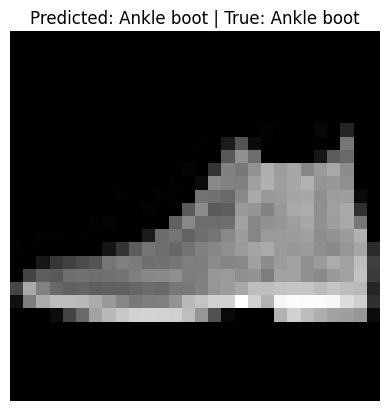

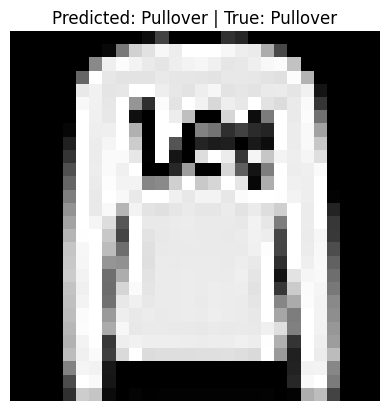

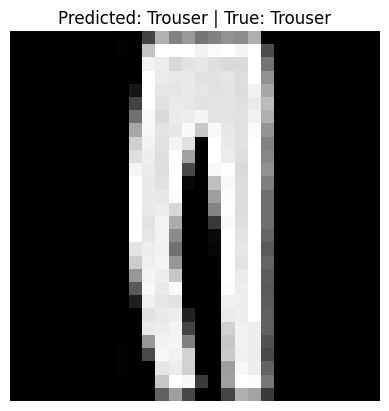

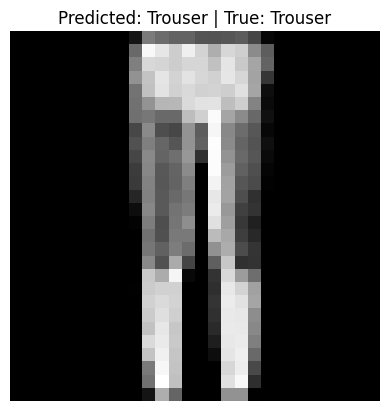

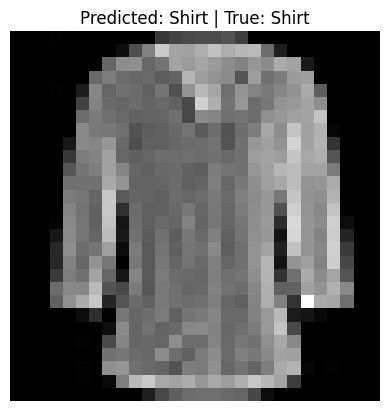

In [ ]:
predictions = model.predict(X_test[:5])

for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]} | True: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()